In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [58]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [59]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2

In [60]:
df = pd.read_csv("data_VGAVX.csv")   # change dataset name

In [61]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-12,19.51,19.51,19.51,19.51,0,2019-04-12,19.5483,2019-04-12,51.0318,2019-04-12,0.0
1,1,2019-04-11,19.56,19.56,19.56,19.56,0,2019-04-11,19.5542,2019-04-11,61.7474,2019-04-11,0.0
2,2,2019-04-10,19.59,19.59,19.59,19.59,0,2019-04-10,19.5533,2019-04-10,69.9281,2019-04-10,0.0
3,3,2019-04-09,19.59,19.59,19.59,19.59,0,2019-04-09,19.5477,2019-04-09,69.9281,2019-04-09,0.0
4,4,2019-04-08,19.57,19.57,19.57,19.57,0,2019-04-08,19.5412,2019-04-08,67.4491,2019-04-08,0.0


In [62]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    19.51
1    19.56
2    19.59
3    19.59
4    19.57
Name: close, dtype: float64

In [63]:
len(close)

1315

In [64]:
train = close.loc[:len(close) -  int(len(close)*0.15)  -1]
test = close.loc[len(close) -  int(len(close)*0.15) :]
print(train.tail())
print(test.head())

1113    19.75
1114    19.77
1115    19.82
1116    19.84
1117    19.92
Name: close, dtype: float64
1118    19.90
1119    19.98
1120    19.97
1121    19.93
1122    19.88
Name: close, dtype: float64


Text(0,0.5,'1-day close price of train set')

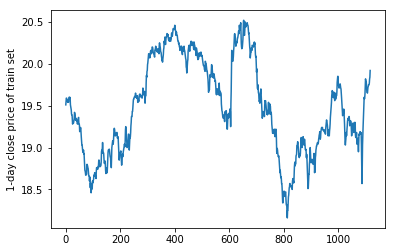

In [65]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price of train set')

Text(0,0.5,'1-day close price of test set')

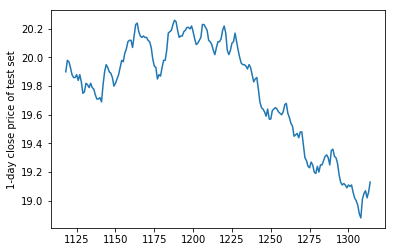

In [66]:
test.plot()
plt.ylabel('1-day close price of test set')

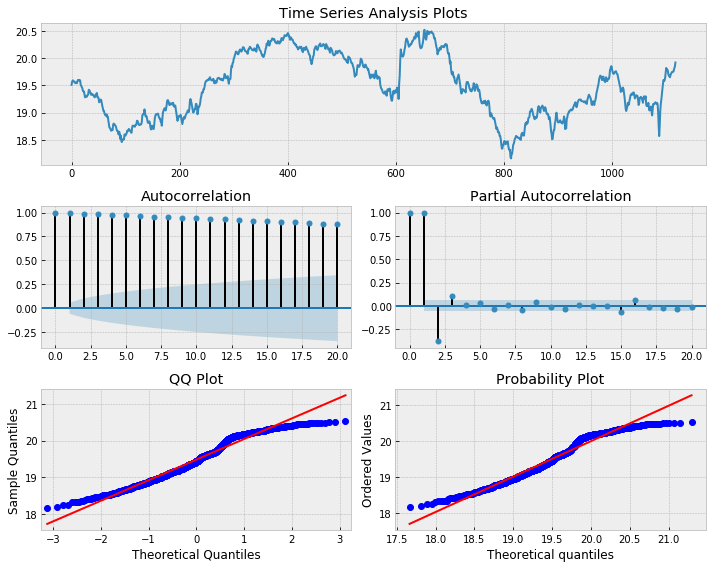

In [67]:
tsplot(train, lags=20)

In [68]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is not small enough to reject the null-hypothesis that the TS is non-stationary

(-1.8123764706545764,
 0.37433466195001497,
 2,
 1115,
 {'1%': -3.4362284023329313,
  '5%': -2.864135631852894,
  '10%': -2.568151990387902},
 -3616.3745880716806)

Text(0,0.5,'Difference in 1-day close price')

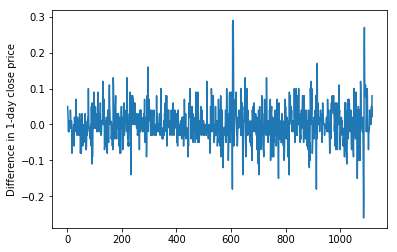

In [69]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [70]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-20.8073829153997,
 0.0,
 1,
 1115,
 {'1%': -3.4362284023329313,
  '5%': -2.864135631852894,
  '10%': -2.568151990387902},
 -3611.7999562181312)

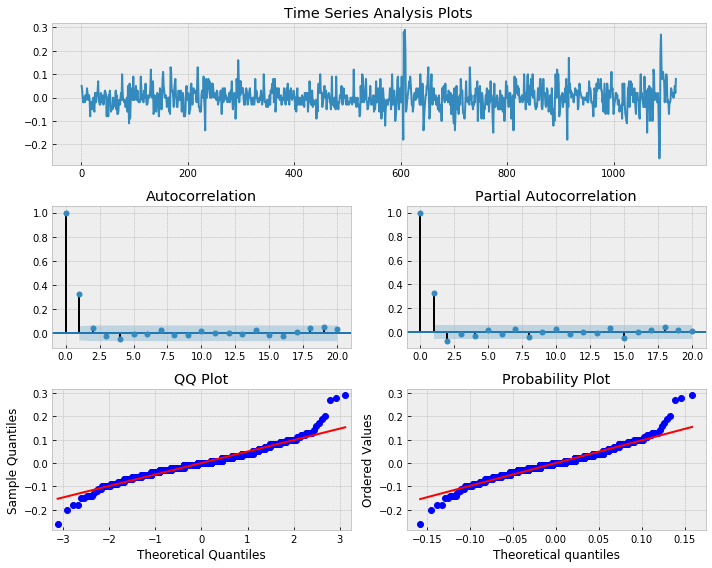

In [71]:
tsplot(train_diff, lags=20)

### Fit Model

In [72]:
arima210 = smt.ARIMA(train, (2,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima210_fit = arima210.fit() #change model name*2
arima210_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1117
Model:                 ARIMA(2, 1, 0)   Log Likelihood                1850.710
Method:                       css-mle   S.D. of innovations              0.046
Date:                Wed, 17 Apr 2019   AIC                          -3693.420
Time:                        14:17:30   BIC                          -3673.347
Sample:                             1   HQIC                         -3685.832
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.002      0.213      0.831      -0.003       0.004
ar.L1.D.close     0.3494      0.030     11.697      0.000       0.291       0.408
ar.L2.D.close    -0.0726      0.030     -2.433      0.015      -0.131      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4047           -2.8253j            3.7101           -0.1378
AR.2            2.4047           +2.8253j            3.7101            0.1378
-----------------------------------------------------------------------------
"""

In [73]:
arima310 = smt.ARIMA(train, (3,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima310_fit = arima310.fit() #change model name*2
arima310_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1117
Model:                 ARIMA(3, 1, 0)   Log Likelihood                1850.846
Method:                       css-mle   S.D. of innovations              0.046
Date:                Wed, 17 Apr 2019   AIC                          -3691.693
Time:                        14:17:32   BIC                          -3666.601
Sample:                             1   HQIC                         -3682.208
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.002      0.214      0.830      -0.003       0.004
ar.L1.D.close     0.3482      0.030     11.627      0.000       0.290       0.407
ar.L2.D.close    -0.0672      0.032     -2.124      0.034      -0.129      -0.005
ar.L3.D.close    -0.0156      0.030     -0.522      0.602      -0.074       0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8767           -2.1030j            2.8187           -0.1340
AR.2            1.8767           +2.1030j            2.8187            0.1340
AR.3           -8.0514           -0.0000j            8.0514           -0.5000
-----------------------------------------------------------------------------
"""

### Analyze residuals

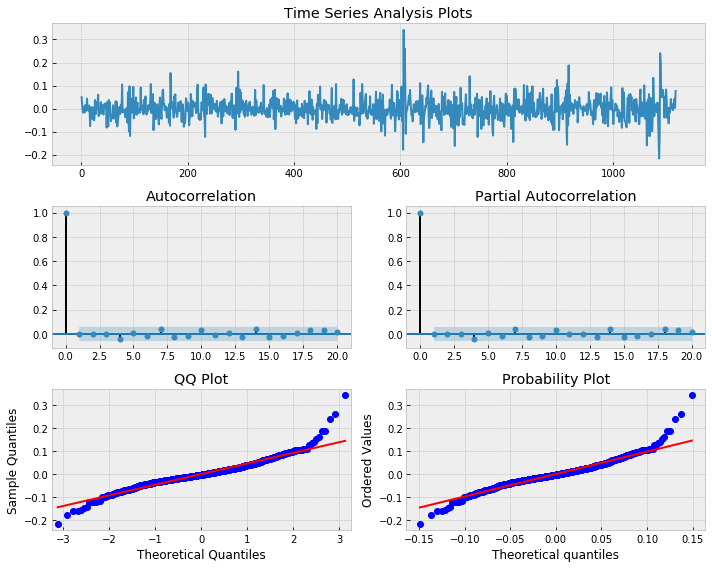

In [74]:
tsplot(arima210_fit.resid, lags=20) #change model name

### Test for remaining autocorrelation

In [75]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima210_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([1.9906769]), array([0.85043356]))

### Forecasting

In [76]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima210_fit.forecast(steps=num_steps)   #change model name

In [77]:
arima210_fit.forecast(steps=num_steps)   #change model name

(array([19.94679323, 19.95063712, 19.95032795, 19.95023495, 19.95051919]),
 array([0.04615032, 0.07751163, 0.10087413, 0.11956139, 0.13555916]),
 array([[19.85634025, 20.0372462 ],
        [19.79871711, 20.10255713],
        [19.7526183 , 20.14803761],
        [19.71589892, 20.18457098],
        [19.68482811, 20.21621027]]))

In [78]:
arima210_fit.forecast(steps=num_steps)[0][4]    #change model name

19.95051919305854

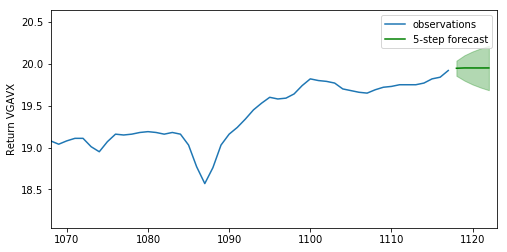

In [79]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return VGAVX')   #change stock name
plt.legend()

### Calculate the performance metrics on test set

In [80]:
pred = []
for i in range( int(len(close)*0.15) ): 
    moving_train = close.loc[:len(close) -  int(len(close)*0.15)  -5 + i]
    moving_arima210 = smt.ARIMA(moving_train, (2,1,0))   #change model parameters  & model name
    moving_arima210_fit = moving_arima210.fit()   #change model name*2
    
    pred.append(moving_arima210_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

197

In [82]:
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9360384944760309
MAE = 0.09785955898063288
RMSE = 0.11897221464275584
Scaled MAE = 0.0709127238990092
Scaled RMSE = 0.08621174974112726
